Best parameters:

- Learning rate = 0.001
- Inner Dense Layer size = 100
- Dropout Rate = 0.2
- Data Augmentation = None

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

E0000 00:00:1736216536.944005   28797 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736216536.971880   28797 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Function to normalize images to RGB format
def normalize_image(image):
    if tf.shape(image)[-1] == 1:  # Grayscale mode (L)
        image = tf.image.grayscale_to_rgb(image)
    elif tf.shape(image)[-1] == 4:  # RGBA mode
        image = image[..., :3]  # Remove the alpha channel
    return image

# Combined function to normalize and preprocess
def custom_preprocessing(image):
    image = normalize_image(image)  # Ensure RGB format
    return preprocess_input(image)  # Preprocess for Xception

# Configure ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=custom_preprocessing)

In [4]:
# Load data

# Train
full_train_generator = datagen.flow_from_directory(
    'Dataset/full_train/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

# Validation
val_generator = datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(299, 299),  # Expected size for Xception
    batch_size=32,
    class_mode='categorical'
)

Found 8175 images belonging to 7 classes.
Found 1445 images belonging to 7 classes.


In [5]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_fv_{epoch:02d}_{val_accuracy:.3f}.weights.h5.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [6]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dense(size_inner, activation='relu'),
        Dropout(droprate), 
        Dense(7, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [7]:
%%time
learning_rate = 0.001
size_inner = 100
droprate=0.2

model = make_model(learning_rate=learning_rate,size_inner=size_inner,droprate=droprate)
history = model.fit(full_train_generator, epochs=30, validation_data=val_generator,callbacks=[checkpoint])


I0000 00:00:1736216542.261405   28797 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/30


I0000 00:00:1736216547.490292   29013 service.cc:148] XLA service 0x7fe37c0101c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1736216547.490707   29013 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
I0000 00:00:1736216548.268433   29013 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1736216562.757832   29013 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216562.896425   29013 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216563.042455   29013 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1

160/256 ━━━━━━━━━━━━━━━━━━━━ 34s 362ms/step - accuracy: 0.6943 - loss: 0.8441

E0000 00:00:1736216636.350216   29012 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216636.495787   29012 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216636.624939   29012 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216636.765490   29012 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216636.910599   29012 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7302 - loss: 0.7446

E0000 00:00:1736216700.248372   29009 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216700.382991   29009 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216700.525033   29009 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1736216700.664799   29009 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


256/256 ━━━━━━━━━━━━━━━━━━━━ 160s 523ms/step - accuracy: 0.7304 - loss: 0.7438 - val_accuracy: 0.8927 - val_loss: 0.3152
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 108s 422ms/step - accuracy: 0.8771 - loss: 0.3290 - val_accuracy: 0.9073 - val_loss: 0.2335
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 106s 416ms/step - accuracy: 0.8954 - loss: 0.2850 - val_accuracy: 0.9308 - val_loss: 0.1766
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 106s 413ms/step - accuracy: 0.9047 - loss: 0.2513 - val_accuracy: 0.9280 - val_loss: 0.1891
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 105s 411ms/step - accuracy: 0.9283 - loss: 0.1859 - val_accuracy: 0.9190 - val_loss: 0.2039
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 105s 409ms/step - accuracy: 0.9313 - loss: 0.1874 - val_accuracy: 0.9502 - val_loss: 0.1270
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 101s 396ms/step - accuracy: 0.9355 - loss: 0.1561 - val_accuracy: 0.9467 - val_loss: 0.1231
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 103s 402ms/step - accuracy: 0.9403 - loss: 0.15

In [9]:
import matplotlib.pyplot as plt

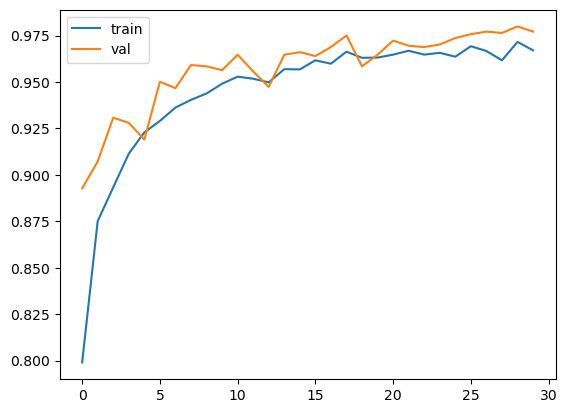

In [11]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

The model shows excellent performance; even the evaluation on the validation set reports higher accuracy than that achieved on the training set. While this is an unexpected effect, it could indicate that the model is generalizing well. However, this result may also stem from other factors, such as differences in data quality between the training and validation sets, statistical randomness, or the effects of regularization techniques like dropout.

Given the scope and time constraints, I will proceed with this model. Nevertheless, it is important to acknowledge areas of opportunity for improvement.

In [14]:
! cp xception_fv_29_0.980.weights.h5.keras models/bcd_xception_acc_0.980.weights.h5.keras

The best model is saved on bcd_xception_acc_0.980.weights.h5.keras file